In [1]:
!pip install -r ../requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('src')
from data_visualizer import DataVisualizer

In [4]:
visualizer = DataVisualizer(save_plot=False)

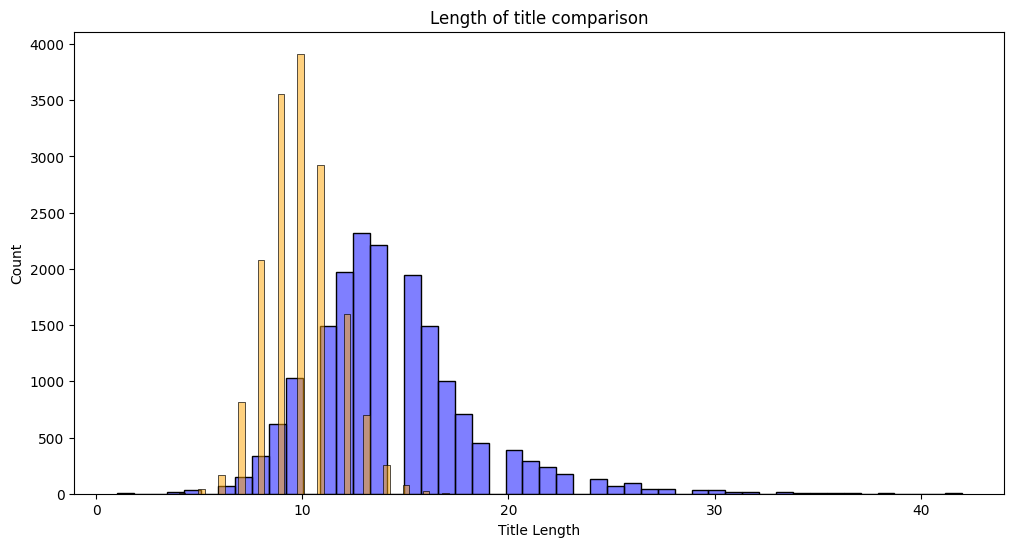

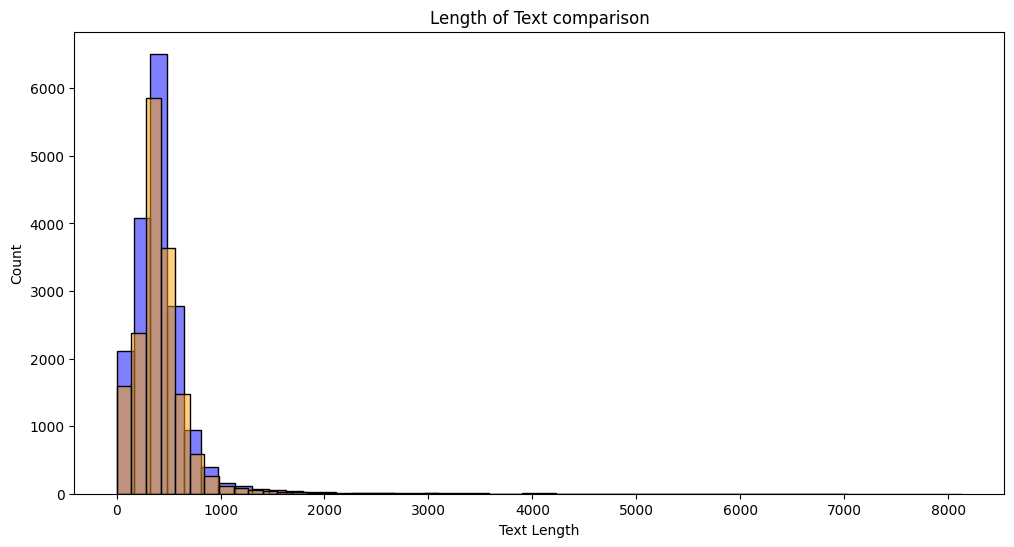

<string>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



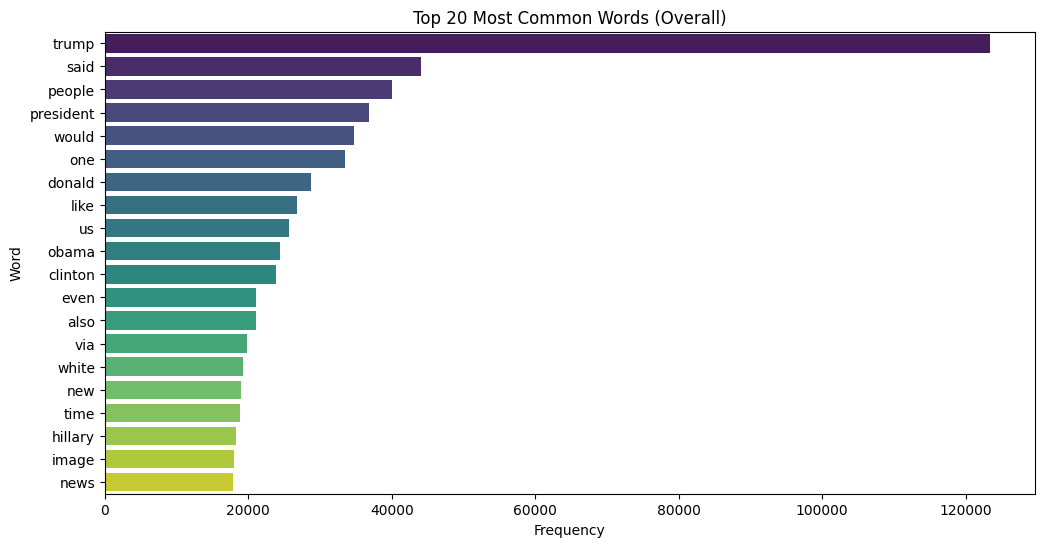

<string>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



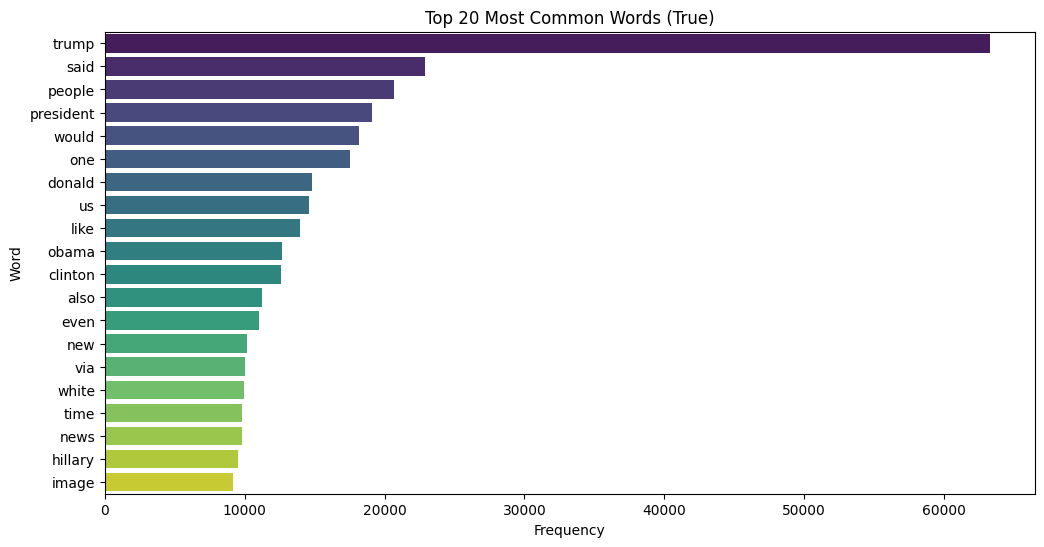

<string>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



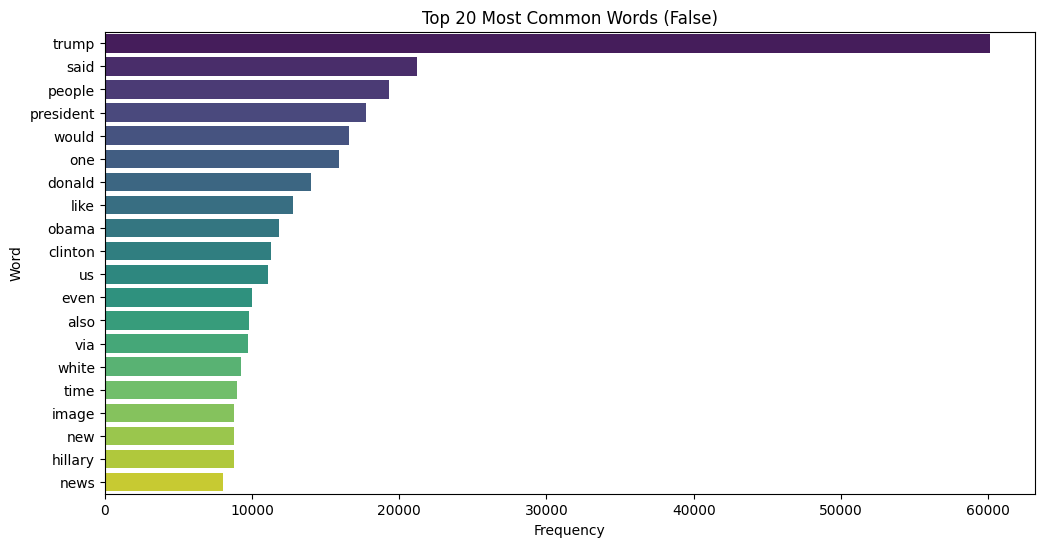

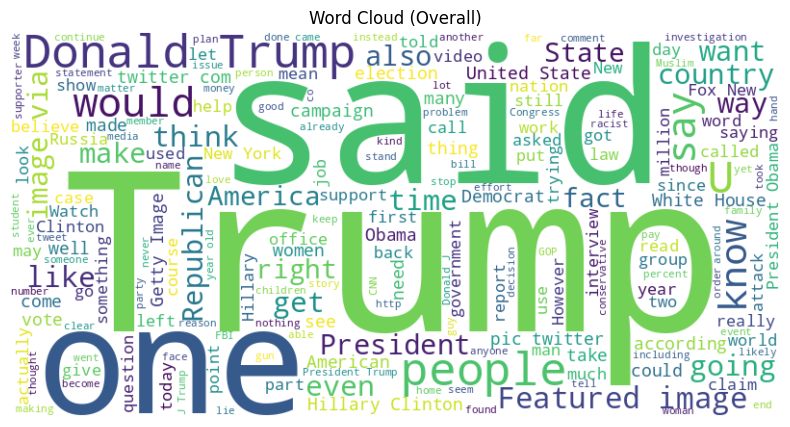

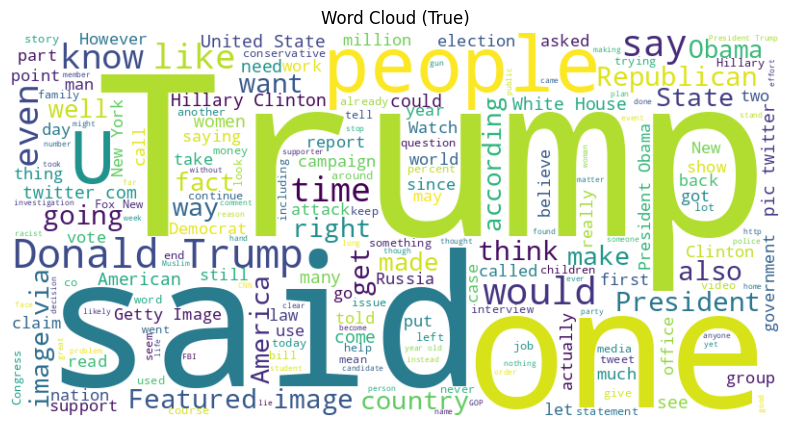

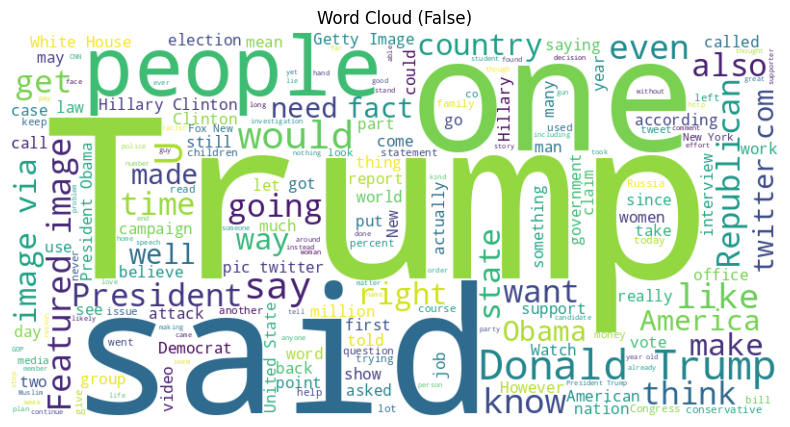

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   date    49 non-null     period[M]
 1   label   49 non-null     bool     
 2   count   49 non-null     int64    
dtypes: bool(1), int64(1), period[M](1)
memory usage: 965.0 bytes


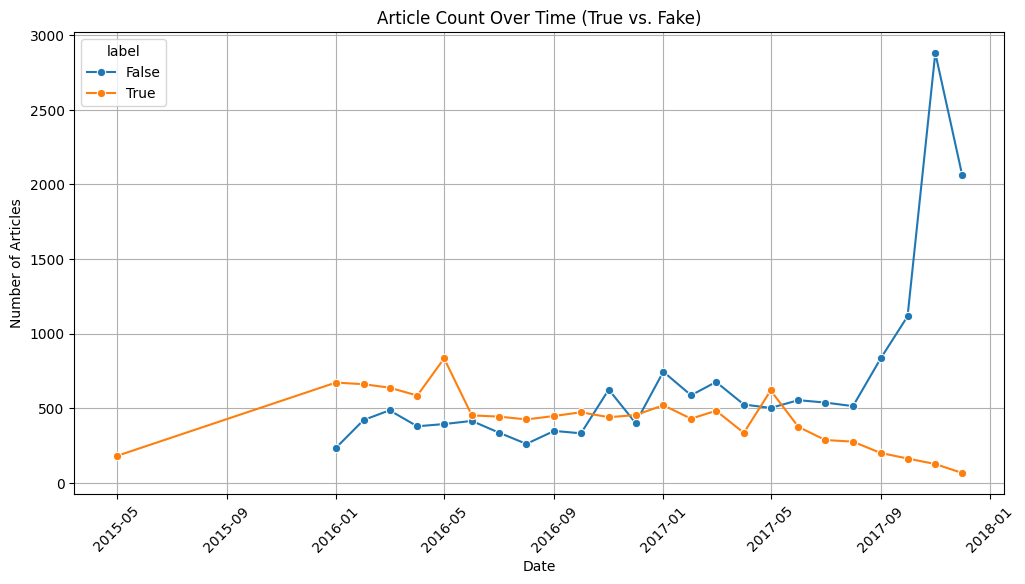

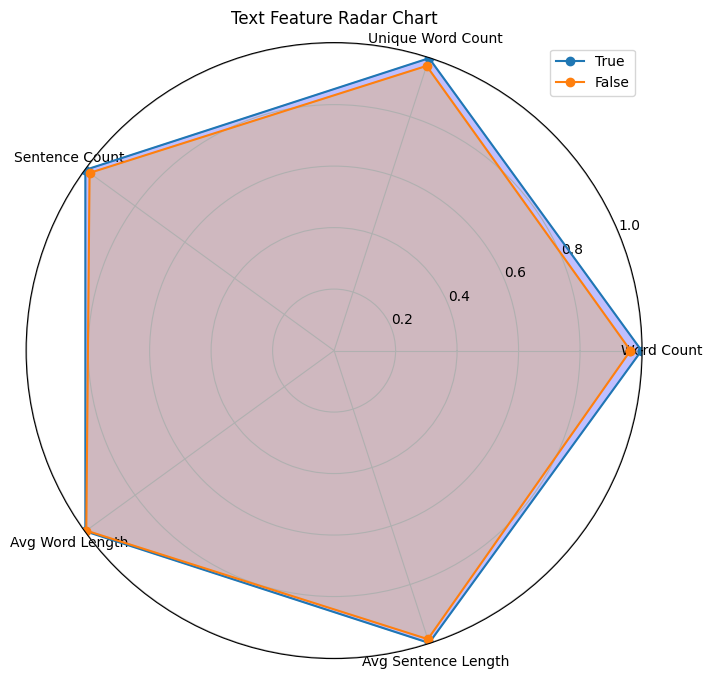

In [5]:
visualizer.plot_title_length_distribution()
visualizer.plot_text_length_distribution()
visualizer.plot_word_frequency()
visualizer.generate_wordcloud()
visualizer.plot_time_series()
visualizer.plot_radar_chart() 

# Model Performance Comparison

In [6]:
from src.model import TextClassifier
from src.data_loader import dataset_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:

train,val,test = dataset_split(path='../raw/')
X_train, y_train = train['title'], train['label']
X_val, y_val = val['title'], val['label']
X_test, y_test = test['title'], test['label']
model_names = {
    'naive_bayes': 'Naive Bayes',
    'logistic_regression': 'Logistic Regression',
    'svm': 'SVM',
    'random_forest': 'Random Forest',
    'knn': 'KNN'
}

tokenizer_names = {
    'tfidf': 'TF-IDF',
    'count': 'Count Vec'
}
results = []
for model_name in model_names.keys():
    for tokenizer_name in tokenizer_names.keys():
        classifier = TextClassifier(model_name, tokenizer_name)
        classifier.train(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Model': model_names[model_name],
            'Tokenizer': tokenizer_names[tokenizer_name],
            'Accuracy': accuracy
        })

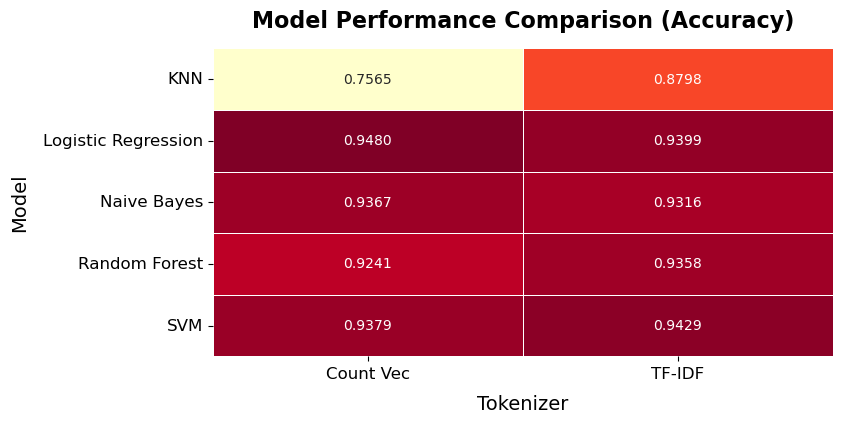

In [8]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', None)
df_results = pd.DataFrame(results)
pivot_table = df_results.pivot(index='Model', columns='Tokenizer', values='Accuracy')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlOrRd", linewidths=0.5, cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Tokenizer", fontsize=14, labelpad=10)
plt.ylabel("Model", fontsize=14, labelpad=10)
plt.title("Model Performance Comparison (Accuracy)", fontsize=16, fontweight="bold", pad=15)
plt.savefig("model_performance.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import matplotlib.pyplot as plt
import os

2025-03-13 03:25:14.440050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 03:25:14.440112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 03:25:14.441839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 03:25:14.453185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
print(device_lib.list_local_devices())
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16467145438781609543
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11045765120
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14878129217958849111
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1"
xla_global_id: 416903419
]
Num GPUs Available: 1


2025-03-13 03:25:17.279584: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [11]:
from train import train_LSTM_classifier

[nltk_data] Downloading package stopwords to /home/kvats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 3361/3361 [00:00<00:00, 102647.97it/s]


Average sequence length: 12.735264586664684
Max sequence length: 43


2025-03-13 03:25:27.462870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 600)           10743600  
                                                                 
 bidirectional (Bidirection  (None, 27, 512)           1755136   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

2025-03-13 03:25:35.407503: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2025-03-13 03:25:37.028163: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f76e0028330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-13 03:25:37.028228: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2025-03-13 03:25:37.041310: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741836337.192624  146335 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


105/106 [============================>.] - ETA: 0s - loss: 0.5650 - accuracy: 0.7075

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - 14s 49ms/step - loss: 0.5648 - accuracy: 0.7076 - val_loss: 0.3601 - val_accuracy: 0.8566 - lr: 5.0000e-05
Epoch 2/20
106/106 [==============================] - 3s 33ms/step - loss: 0.2707 - accuracy: 0.8920 - val_loss: 0.2489 - val_accuracy: 0.8982 - lr: 5.0000e-05
Epoch 3/20
106/106 [==============================] - 3s 29ms/step - loss: 0.2262 - accuracy: 0.9105 - val_loss: 0.2987 - val_accuracy: 0.8703 - lr: 5.0000e-05
Epoch 4/20
106/106 [==============================] - 3s 33ms/step - loss: 0.2185 - accuracy: 0.9132 - val_loss: 0.2197 - val_accuracy: 0.9072 - lr: 5.0000e-05
Epoch 5/20
106/106 [==============================] - 3s 32ms/step - loss: 0.2031 - accuracy: 0.9193 - val_loss: 0.2130 - val_accuracy: 0.9128 - lr: 5.0000e-05
Epoch 6/20
106/106 [==============================] - 3s 30ms/step - loss: 0.1933 - accuracy: 0.9236 - val_loss: 0.2167 - val_accuracy: 0.9081 - lr: 5.0000e-05
Epoch 7/20
106/106 [==============================

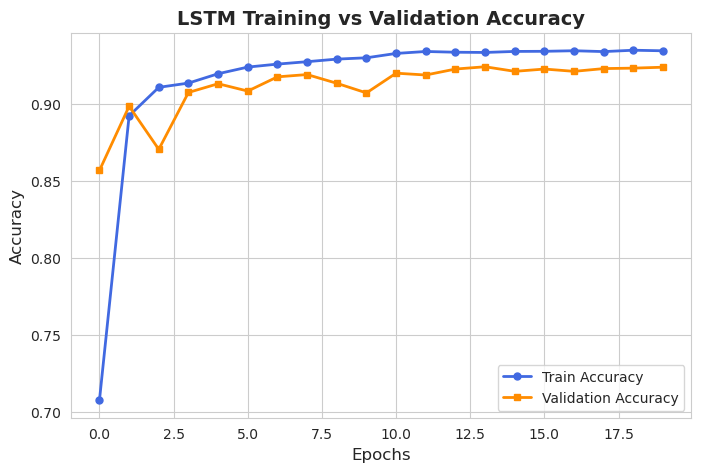

Created: ./model/LSTM/weight_parts/model_weights.h5.part1


In [12]:
train_LSTM_classifier('./model/LSTM')

In [13]:
from evaluate import eval_LSTM_classifier

[nltk_data] Downloading package stopwords to /home/kvats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Merging weights files
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 27, 600)           10743600  
                                                                 
 bidirectional_2 (Bidirecti  (None, 27, 512)           1755136   
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (No

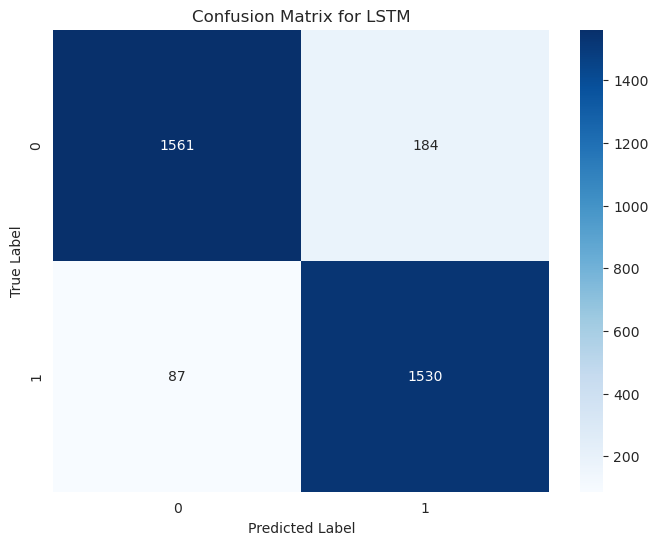

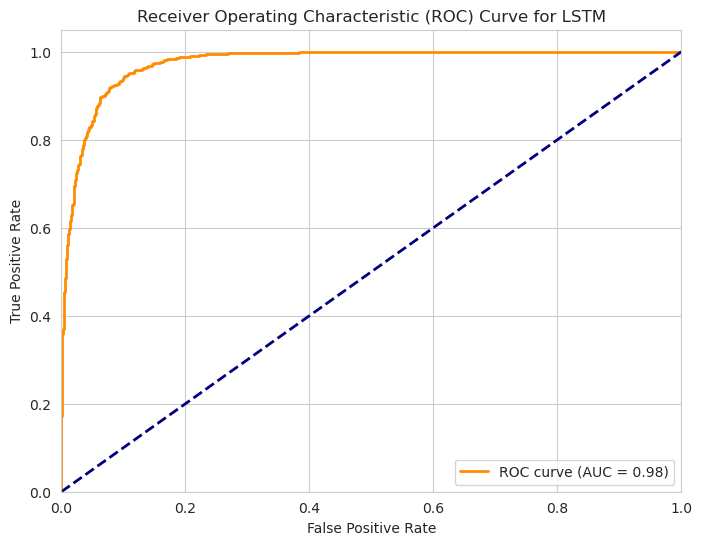

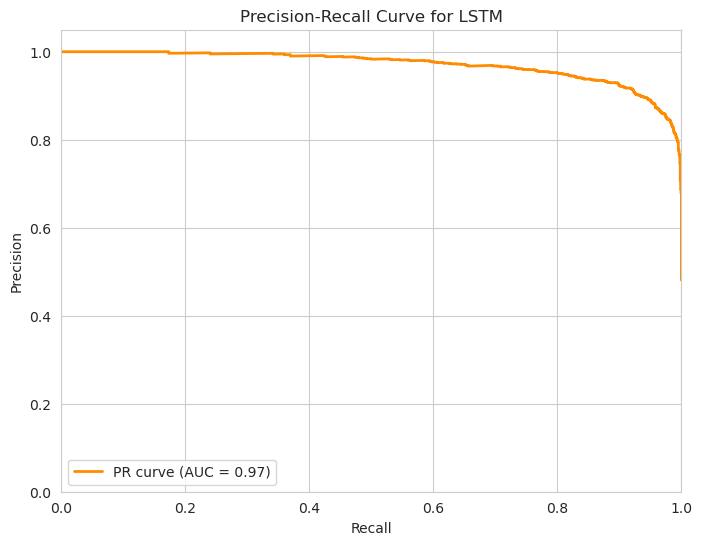

In [14]:
eval_LSTM_classifier("LSTM", "./model/LSTM", "./results/")

In [15]:
from train import train_BERT_classifier

2025-03-14 10:31:54.835715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741948314.855076    2524 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741948314.861040    2524 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 10:31:54.881730: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/opt/conda/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/5], Step [52/525], Train Loss: 0.6650, Valid Loss: 0.5430
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [1/5], Step [104/525], Train Loss: 0.3226, Valid Loss: 0.1596
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [2/5], Step [156/525], Train Loss: 0.1235, Valid Loss: 0.0851
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [2/5], Step [208/525], Train Loss: 0.0768, Valid Loss: 0.0637
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [3/5], Step [260/525], Train Loss: 0.0416, Valid Loss: 0.0544
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [3/5], Step [312/525], Train Loss: 0.0378, Valid Loss: 0.0489
Model saved to ==> ./model/BERT/model.pt
Model saved to ==> ./model/BERT/metrics.pt
Epoch [4/5], Step [364/525], Train Loss: 0.0199, Valid Loss: 0.0546
Epoch [4/5], Step [41

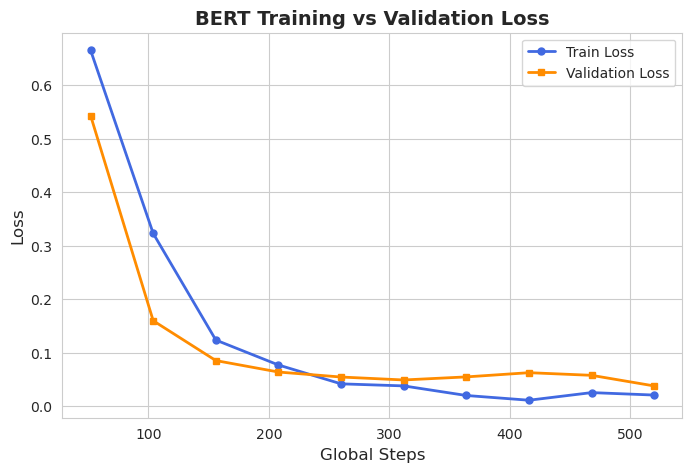

In [16]:
train_BERT_classifier("./model/BERT")

In [17]:
from evaluate import eval_BERT_classifier

/opt/conda/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded from <== ./model/BERT/model.pt

=== Model Performance ===
Accuracy: 0.9891

=== Detailed Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15701
           1       0.99      0.99      0.99     14553

    accuracy                           0.99     30254
   macro avg       0.99      0.99      0.99     30254
weighted avg       0.99      0.99      0.99     30254


=== Visualization Results ===


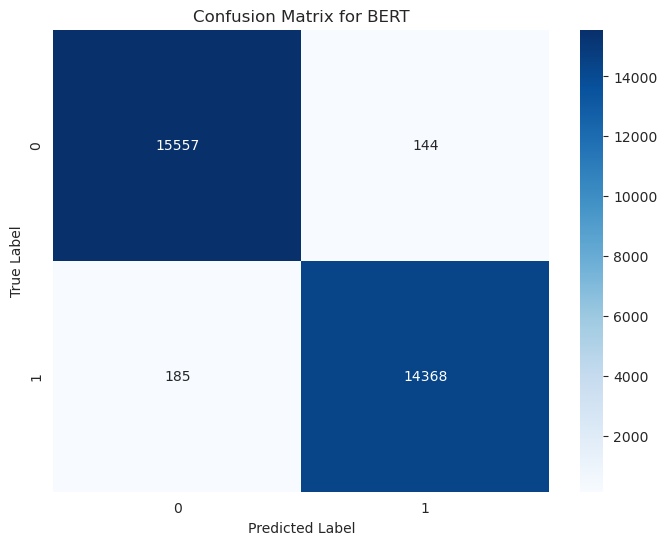

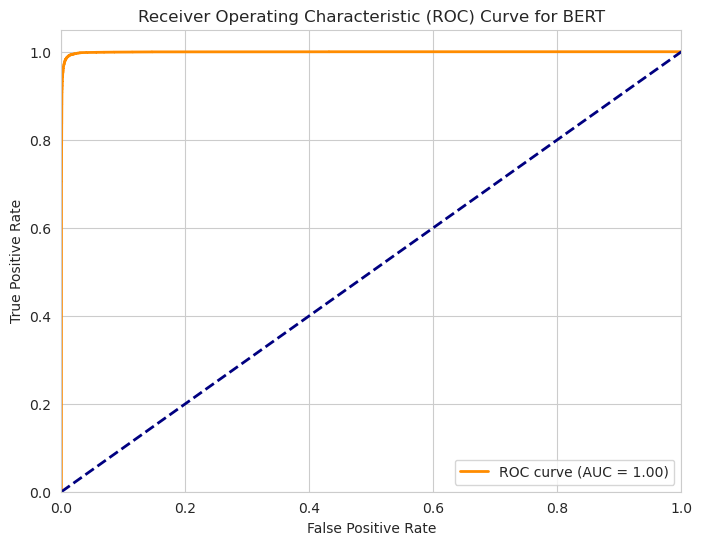

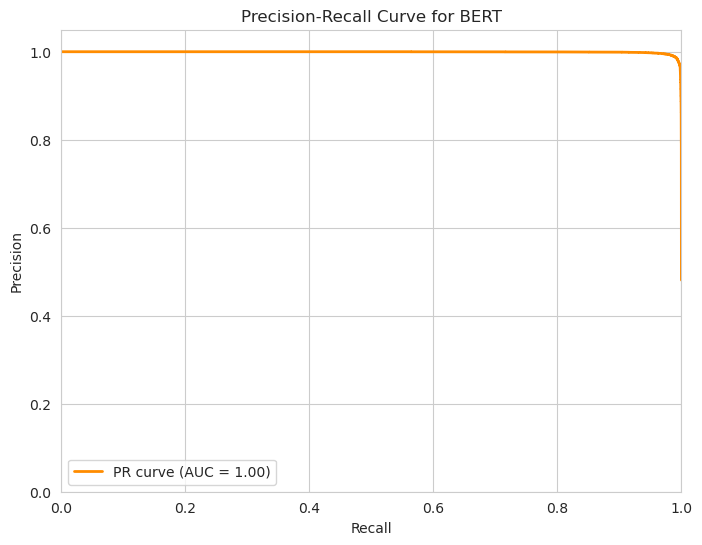

In [18]:
eval_BERT_classifier("BERT", "./model/BERT", "./results")

In [19]:
import matplotlib.pyplot as plt
import json

In [20]:
with open('./llmsAsChecker/data/true_deepseek.json') as file:
    true_deepseek = json.load(file)
with open('./llmsAsChecker/data/fake_deepseek.json') as file:
    fake_deepseek = json.load(file)

In [21]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_deepseek:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_deepseek:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

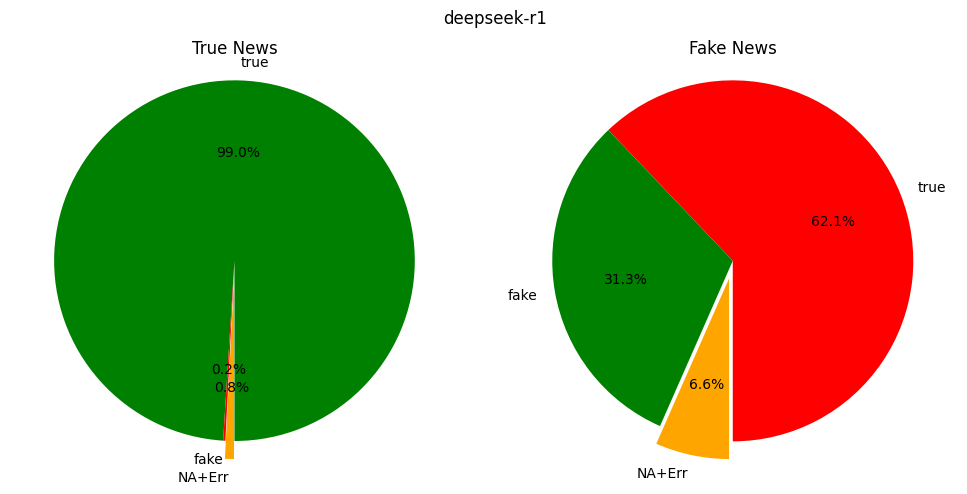

In [22]:
label = ['true', 'fake', 'NA+Err']
slice_colors_true = ['green', 'red', 'orange']
slice_colors_fake = ['red', 'green', 'orange']
explode = [0.0, 0.0, 0.1]
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('deepseek-r1')
plt.show()

In [23]:
precision = ff/(ff+tf)
recall = ff/(ff+ft)
print(f"Completion Rate: {(tt+tf+ff+ft)/2000} Accuracy: {(tt+ff)/(tt+ff+tf+ft)} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Completion Rate: 0.963 Accuracy: 0.6765316718587746 Precision: 0.9936507936507937 Recall: 0.3351177730192719 F-score: 0.5012009607686149


In [24]:
with open('./llmsAsChecker/data/true_llama.json') as file:
    true_llama = json.load(file)
with open('./llmsAsChecker/data/fake_llama.json') as file:
    fake_llama = json.load(file)

In [25]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_llama:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_llama:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

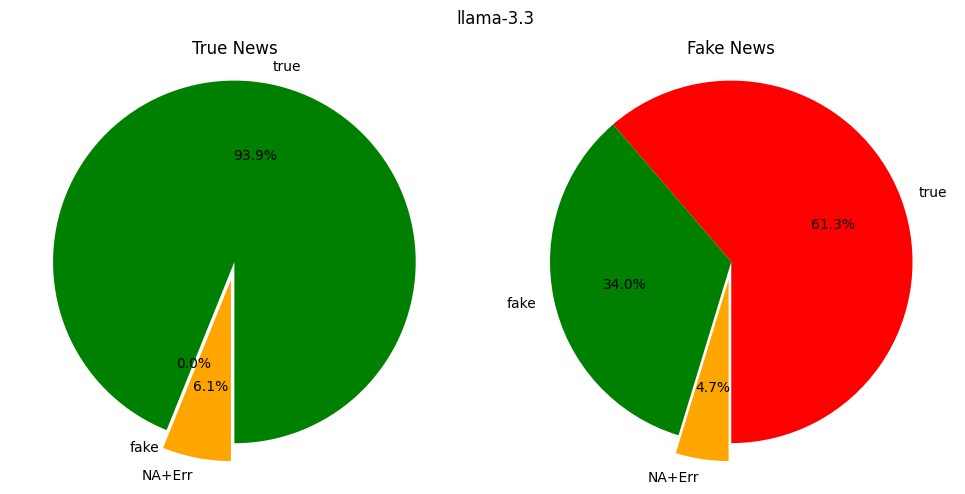

In [26]:
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('llama-3.3')
plt.show()

In [27]:
precision = ff/(ff+tf)
recall = ff/(ff+ft)
print(f"Completion Rate: {(tt+tf+ff+ft)/2000} Accuracy: {(tt+ff)/(tt+ff+tf+ft)} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Completion Rate: 0.946 Accuracy: 0.6760042283298098 Precision: 1.0 Recall: 0.3567681007345226 F-score: 0.525908739365816


In [28]:
import pprint
for sample in true_deepseek:
    if sample['label'] == 'NA' or sample['label'] == 'Err' or sample['label'] == 'fake':
        pprint.pprint(sample)

{'date': 'December 11, 2017 ',
 'id': 12610,
 'label': 'Err',
 'reason': "Analysis failed: Error code: 400 - {'error': {'message': 'Content "
           "Exists Risk', 'type': 'invalid_request_error', 'param': None, "
           "'code': 'invalid_request_error'}}",
 'subject': 'worldnews',
 'text': 'BEIJING (Reuters) - China s prosecutor began on Monday formal legal '
         'proceedings against disgraced senior politician Sun Zhengcai, once '
         'considered a contender for top leadership, who has been accused of '
         'corruption and other crimes. Sun was abruptly removed from his post '
         'as party chief of the southwestern metropolis of Chongqing - one of '
         'China s most important cities - in July and replaced by Chen Miner, '
         'who is close to President Xi Jinping.  Later that month, he was put '
         'under investigation and in September, the party announced he would '
         'be prosecuted for corruption. Sun was accused of leaking secre

In [29]:
for sample in fake_deepseek:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'September 11, 2016',
 'id': 23268,
 'label': 'NA',
 'reason': 'The article describes a scheduled radio episode featuring '
           'discussions and opinions on historical and geopolitical events. It '
           'does not make verifiable factual claims but rather promotes '
           'upcoming content, which falls outside the scope of fact-checking '
           'for truth or falsity.',
 'subject': 'Middle-east',
 'text': 'Episode #152 of SUNDAY WIRE SHOW resumes this Sunday September 11, '
         '2016 as host Patrick Henningsen broadcasts a 4 HOUR SPECIAL of LIVE '
         'power-packed talk radio on ACR LISTEN LIVE ON THIS PAGE AT THE '
         'FOLLOWING SCHEDULED SHOW TIMES:SUNDAYS   5pm-8pm UK Time | 12pm-3pm '
         'ET (US) | 9am-12pm PT (US)This week s edition of THE SUNDAY WIRE is '
         'on the road broadcasting LIVE from the Valley of the Sun. This week '
         'host Patrick Henningsen covers this week s top stories '
         'internationally, in

In [30]:
for sample in true_llama:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'August 12, 2017 ',
 'id': 2210,
 'label': 'Err',
 'reason': 'Analysis failed: Invalid json output: Cut-m Knowledge, Date: '
           'August 3, 2017, 1, North Korea, the "NA\'\n'
           'For troubleshooting, visit: '
           'https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE ',
 'subject': 'politicsNews',
 'text': 'SEOUL (Reuters) - North Korea said on Saturday that nearly 3.5 '
         'million workers, party members and soldiers volunteered to join or '
         'rejoin its army to resist new U.N. sanctions and to fight against '
         'the United States in the current geopolitical tension between '
         'Pyongyang and Washington.  Rodong Sinmun, North Korea’s official '
         'newspaper, said the volunteers had offered to join or rejoin the '
         'People’s Army after the Korea Central News Agency (KCNA) issued a '
         'statement on Monday condemning new sanctions imposed by the United '
         'Nations  in retal

In [31]:
for sample in fake_llama:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'November 8, 2016',
 'id': 3887,
 'label': 'Err',
 'reason': "Analysis failed: Error code: 429 - {'error': {'message': 'Rate "
           'limit reached for model `llama-3.3-70b-versatile` in organization '
           '`org_01jp12cn8yfbmagp06d8fp23an` service tier `on_demand` on '
           'tokens per minute (TPM): Limit 250000, Used 249359, Requested 931. '
           'Please try again in 69.48ms. Need more tokens? Visit '
           "https://groq.com/self-serve-support/ to request higher limits.', "
           "'type': 'tokens', 'code': 'rate_limit_exceeded'}}",
 'subject': 'News',
 'text': 'Donald Trump showed up to vote in New York City with his wife '
         'Melania and hilarity ensued.When the Trump s walked through the '
         'doors they were greeted by a round of boos and jeers. Clearly, New '
         'York voters are not Trump fans.But Trump s day got even worse when '
         'he tried to sneak a peek at Melania s ballot, apparently just making '
         